In [1]:
import sys
sys.path.append("..")

In [2]:
from data_tools.tools import *

In [3]:
path_to_results = "../data/results/DE_2_1"

results = load_feather_folder_as_pd(path_to_results)

0.018333911895751953


In [16]:
#sort results by mse
results = results.sort_values(by="mse")

#add a column gamma np.sqrt(0.5*1/sigma)
results["gamma"] = np.sqrt(0.5*1/results["sigma"])

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
results.head()


,f_PQK,optimal_alpha_PQK,sigma,mse,CI_encoding_circuit_label,CI_num_qubits,CI_num_layers
126,"[0.9045383538191345, 0.520105723585857, 0.2297...","[2369.511983330049, -2559.6057705441635, -4196...",5.404391,0.173420,HardwareEfficientEmbeddingCircuit_qiskit,3,3
5,"[0.6292070813355508, 0.29467011530499576, 0.03...","[-105.82884397029926, 9163.550170942593, 2112....",0.398004,0.176162,HardwareEfficientEmbeddingCircuit_qiskit,2,1
28,"[0.9004479407162123, 0.5607055662825857, 0.292...","[37.39839290398634, 22309.466169837375, 5246.3...",0.984918,0.183140,HardwareEfficientEmbeddingCircuit_qiskit,2,2
200,"[0.7722203828861893, 0.47560482443714136, 0.19...","[2603.829020997065, -221.48077154149502, -206....",50.000000,0.192055,HardwareEfficientEmbeddingCircuit_qiskit,4,3
79,"[1.047718874162399, 0.652519604291399, 0.34113...","[-234.85662181018893, 11318.039688010911, -688...",0.595041,0.195509,HardwareEfficientEmbeddingCircuit_qiskit,3,1


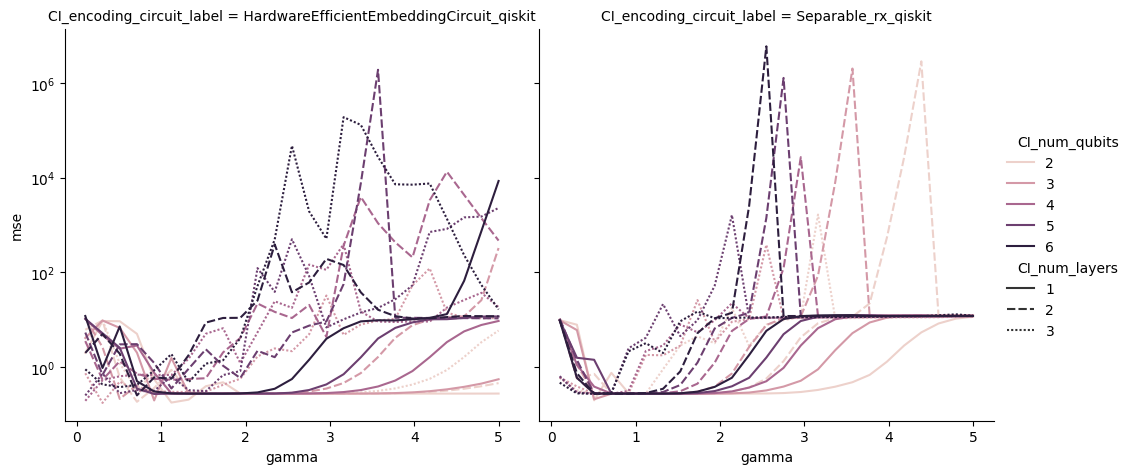

In [19]:
#log scale 

g = sns.relplot(x="gamma", y="mse", data=results, style="CI_num_layers", kind="line", col="CI_encoding_circuit_label", hue="CI_num_qubits")
g.set(yscale="log")

In [22]:
def f_analytical_fun(x):
    """Analytical solution of the ODE from the paper

    """
    lamb  = 20
    k = 0.1
    return np.exp(-lamb*x*k)*np.cos(lamb*x)

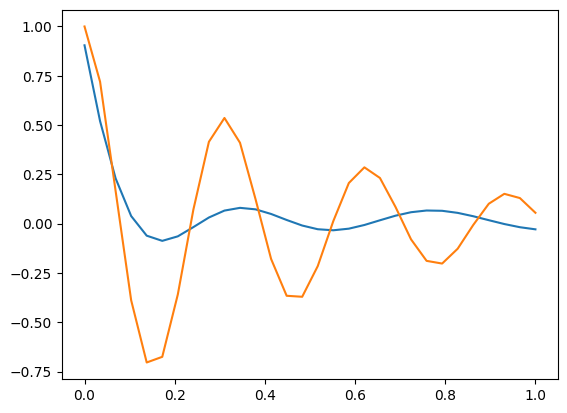

In [23]:
#result with lowest mse
x_span = np.linspace(0, 1, 30)
plt.plot(x_span, results.iloc[0]["f_PQK"])
plt.plot(x_span, f_analytical_fun(x_span))